# Загружаем необходимые библиотеки и наш датасет

In [325]:
import pandas as pd

import numpy as np

from matplotlib import cm 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans

In [326]:
data=load_iris()

In [327]:
list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [328]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Оставляем только нужные фичи

In [329]:
df = df[['sepal width (cm)', 'petal width (cm)']]
df.columns = ['sepal width (cm)', 'petal width (cm)']
df

,sepal width (cm),petal width (cm)
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
...,...,...
145,3.0,2.3
146,2.5,1.9
147,3.0,2.0
148,3.4,2.3


Описание данных датасета:

- длина чашелистика в см
- ширина чашелистика в см
- длина лепестка в см
- ширина лепестка в см

In [330]:
df.isnull().sum()

sepal width (cm)    0
petal width (cm)    0
dtype: int64

Пропусков данных нет

Стандартизация данных

In [331]:
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=['sepal width (cm)', 'petal width (cm)'])
df

,sepal width (cm),petal width (cm)
0,1.019004,-1.315444
1,-0.131979,-1.315444
2,0.328414,-1.315444
3,0.098217,-1.315444
4,1.249201,-1.315444
...,...,...
145,-0.131979,1.448832
146,-1.282963,0.922303
147,-0.131979,1.053935
148,0.788808,1.448832


# Проведем необходимый анализ данных и кластеризацию по двум базовым признакам

In [332]:
features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names


Распределение признаков sepal width и petal width:

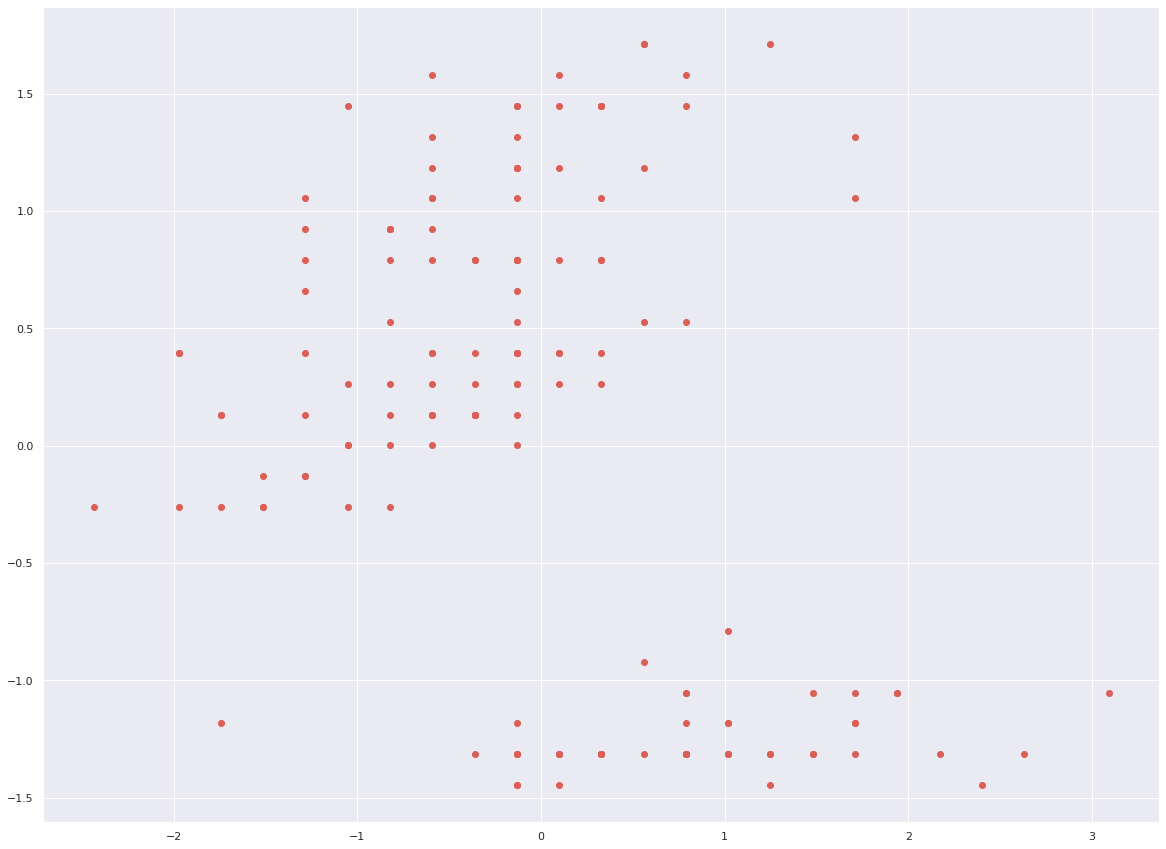

In [333]:
plt.figure(figsize=(20,15))
plt.scatter(df['sepal width (cm)'], df['petal width (cm)'])

Предположительно, оптимальное число кластеров равно 2

In [334]:
K1 = 2

А теперь предположим количество кластеров методом локтя

Text(0, 0.5, 'WCSS')

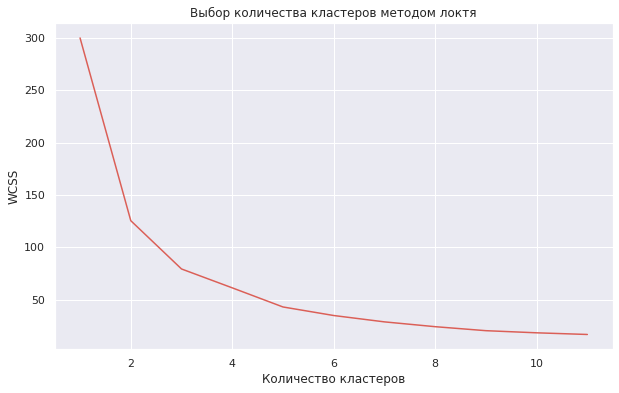

In [335]:
#это показатель нашей ошибки кластеризации
wcss = []

# рассмотрим число кластреров от 1 до 10
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1, 12), wcss)
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

Предположительное число кластеров в этом случае - 4

In [336]:
K2 = 4

Обучим модель на числе кластеров 2 и 4

In [337]:
palette = sns.color_palette("hls", 8)
sns.set_theme(palette=palette)

-------------------
-------------------
При числе кластеров 2
-------------------
     Target  Prediction  Comparison
0         0           0        True
1         0           0        True
2         0           0        True
3         0           0        True
4         0           0        True
..      ...         ...         ...
145       2           1       False
146       2           1       False
147       2           1       False
148       2           1       False
149       2           1       False

[150 rows x 3 columns]
-------------------
True     0.66
False    0.34
Name: Comparison, dtype: float64
-------------------


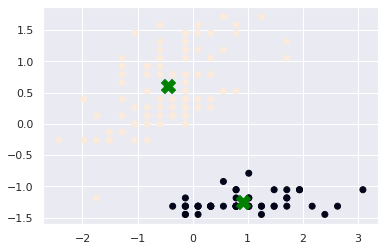

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
При числе кластеров 4
-------------------
     Target  Prediction  Comparison
0         0           0        True
1         0           0        True
2         0           0        True
3         0           0        True
4         0           3       False
..      ...         ...         ...
145       2           2        True
146       2           1       False
147       2           2        True
148       2           2        True
149       2           2        True

[150 rows x 3 columns]
-------------------
True     0.71
False    0.29
Name: Comparison, dtype: float64
-------------------


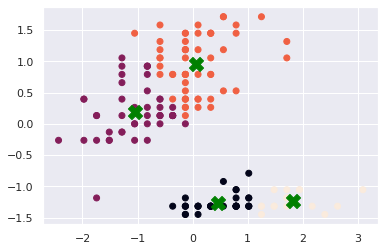

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


In [338]:
for i in [K1, K2]:
  print('-------------------')
  print('-------------------')
  print('При числе кластеров', i)
  print('-------------------')
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
  y_pred = kmeans.fit_predict(df)
  # поместим предсказания в словарь
  d = {'Target' : data.target, 'Prediction' : y_pred}
  # превратим словарь в датафрейм с соответствующими названиями столбцов
  DF = pd.DataFrame(d, columns = ['Target', 'Prediction'])
  DF['Comparison'] = np.where(DF['Target'] == DF['Prediction'], True, False)
  print(DF)
  print('-------------------')
  print(DF['Comparison'].value_counts(normalize = True).round(2))
  print('-------------------')
  plt.scatter(df['sepal width (cm)'], df['petal width (cm)'], c=kmeans.labels_)
  plt.scatter(kmeans.cluster_centers_ [:, 0], kmeans.cluster_centers_ [:, 1], s=200, marker= 'X', c = 'green', label = 'центроиды')
  plt.show()
  print('-------------------')
  print('-------------------')
  print('-------------------')
  print('-------------------')
  print('-------------------')
  print('-------------------')
  print('-------------------')
  print('-------------------')
  print('-------------------')

Очевидно, что наилучшее число кластеров - 4

Также выше приведены диаграммы рассеивания, на которой наблюденияиз разных кластеров будут выделены соответствующими цветами, и нанесены центроиды.

Но в данном датасете 3 класса. Сделаем построение на 3 и 4 класса, посчитаем коэффициент силуэта

Средний коэффициент силуэта --  0.46167606360824265


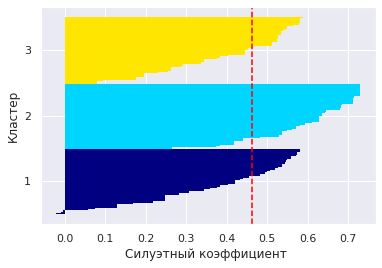

------------------------------
Средний коэффициент силуэта --  0.43955969816160706


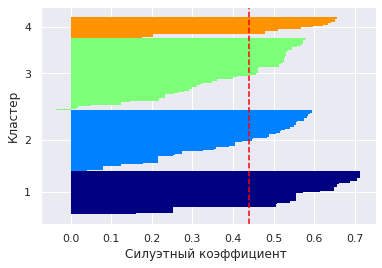

------------------------------


In [339]:
for i in [3,4]:
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
  y_pred = kmeans.fit_predict(df)
  cluster_labels = np.unique(y_pred) 
  n_clusters = cluster_labels.shape[0] 
  silhouette_vals = silhouette_samples(df, y_pred, metric='euclidean')

  y_ax_lower , y_ax_upper = 0, 0 
  yticks = [] 
  for i, c in enumerate(cluster_labels): 
    c_silhouette_vals = silhouette_vals[y_pred == c] 
    c_silhouette_vals.sort() 
    y_ax_upper += len(c_silhouette_vals) 
    color = cm.jet(float(i) / n_clusters) 
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals , 
             height=1.0, 
             edgecolor='none', 
             color=color) 
    yticks.append((y_ax_lower + y_ax_upper) / 2) 
    y_ax_lower += len(c_silhouette_vals) 
  silhouette_avg = np.mean(silhouette_vals) 
    
  plt.axvline(silhouette_avg, color= "red", linestyle="--" ) 
  print ("Средний коэффициент силуэта -- ", silhouette_avg)
  plt.yticks(yticks, cluster_labels + 1) 
  plt.ylabel ('Кластер') 
  plt.xlabel('Силуэтный коэффициент ' ) 
  plt.show() 
  print('------------------------------')

При 3х кластерах толщина силуэтов более равномерная. Его значение среднего коэффициента силуэта немного выше, чем при 4х. 3 кластера - более оптимальное разбиение.

# (первые 5 пунктов ЛР проделаны). Далее добавим к выборке доп.показатель и снова проведем кластеризацию с оптимальным числом кластеров.

In [340]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df.drop('petal length (cm)', axis = 1)
df.head()

,sepal length (cm),sepal width (cm),petal width (cm)
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2


Разделим выборку 80/20

In [341]:
df_train = df.sample(frac=0.8)
df_pred = df.drop(df_train.index)

Оперделим оптимальное кол-во кластеров

Text(0, 0.5, 'WCSS')

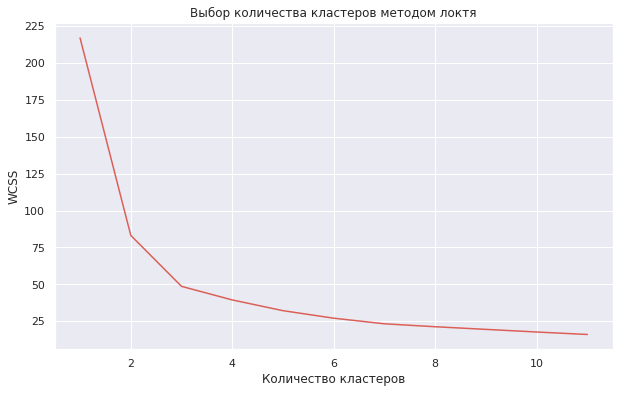

In [342]:
wcss = []

# рассмотрим число кластреров от 1 до 10
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1, 12), wcss)
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

Как видно на следующем выше графике, заметных изменений не обнаружилось.

Оптимальное кол-во кластеров - 3

Создаем экземпляр модели и обучаем ее на тренировочных данных

In [343]:
kmeans = KMeans(n_clusters=3,random_state=1).fit(df_train.values)
y_train = kmeans.fit_predict(df_train) 
silhouette_vals = silhouette_samples(df_train, y_train, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals) 
print ("Средний коэффициент силуэта -- ", silhouette_avg)

Средний коэффициент силуэта --  0.46783861375624247


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Делаем прогноз на тестовую

In [344]:
y_pred = kmeans.fit_predict(df_pred) 
silhouette_vals = silhouette_samples(df_pred, y_pred, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals) 
print ("Средний коэффициент силуэта -- ", silhouette_avg)

Средний коэффициент силуэта --  0.519369375394676


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Значение среднего силуэтного коэффициента незначительно улучшилось.

# Далее проведем статистический анализ кластеров

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


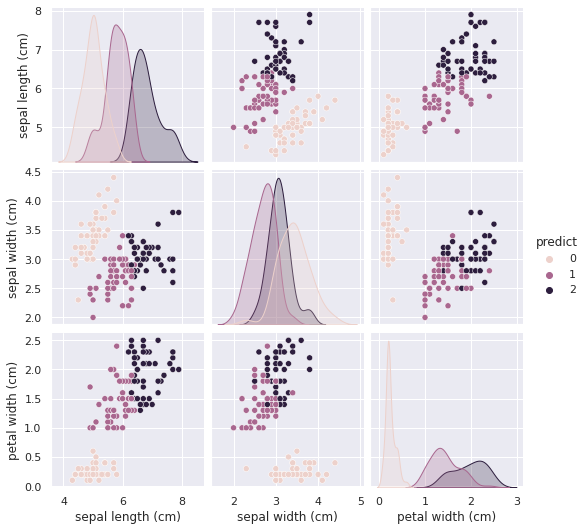

In [345]:
kmeans = KMeans(n_clusters=3,random_state=1).fit(df.values)
df['predict']= kmeans.fit_predict(df) 
sns.pairplot(df, hue='predict')
plt.show()

# Дополнительное задание. Оценку точности по Accuracy

Для 2х параметров:

In [346]:
labels_true = data.target

kmeans = KMeans(n_clusters=3, random_state=1).fit(df_2)
labels_pred = kmeans.labels_

acc = accuracy_score(labels_true, labels_pred)

print(acc)

0.25333333333333335


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Для 3х параметров:

In [347]:
df = df.drop('predict', axis = 1)

In [348]:
labels_true = data.target

kmeans = KMeans(n_clusters=3, random_state=1).fit(df)
labels_pred = kmeans.labels_

acc = accuracy_score(labels_true, labels_pred)

print(acc)

0.8266666666666667


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Вывод: accuracy для выборки с тремя фичами намного выше и достигает достаточно высокого значения